**Overview:**
This dataset contains detailed information on traffic accidents across various regions and time periods. It includes various metrics such as accident date, weather conditions, lighting conditions, crash types, injuries, and vehicle involvement. The data spans multiple locations and accident types, offering a comprehensive view of traffic incidents and their causes.

https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents/code

**Objective**
*   **Accident Analysis:** Analyze accident trends, types, and the severity of injuries across different locations, time periods, and conditions.
*   **Traffic Safety:** Understand the factors contributing to accidents (e.g., weather, lighting, road conditions) to inform traffic safety measures.
*   **Predictive Modeling:** Use the dataset to forecast accident hotspots, potential injuries, and the impact of various factors on crash severity.

**Characteristics of each columns**
*   **crash_date:** The date the accident occurred.
traffic_control_device: The type of traffic control device involved (e.g., traffic light, sign).
*   **weather_condition:** The weather conditions at the time of the accident.
*   **lighting_condition:** The lighting conditions at the time of the accident.
*   **first_crash_type:** The initial type of the crash (e.g., head-on, rear-end).
*   **trafficway_type:** The type of roadway involved in the accident (e.g., highway, local road).
*   **alignment:** The alignment of the road where the accident occurred (e.g., straight, curved).
*   **roadway_surface_cond:** The condition of the roadway surface (e.g., dry, wet, icy).
*   **road_defect:** Any defects present on the road surface.
*   **crash_type:** The overall type of the crash.
*   **intersection_related_i:** Whether the accident was related to an intersection.
*   **damage:** The extent of the damage caused by the accident.
*   **prim_contributory_cause:** The primary cause contributing to the crash.
*   **num_units:** The number of vehicles involved in the accident.
*   **most_severe_injury:** The most severe injury sustained in the crash.
*   **injuries_total:** The total number of injuries reported.
*   **injuries_fatal:** The number of fatal injuries resulting from the accident.
*   **injuries_incapacitating:** The number of incapacitating injuries.
*   **injuries_non_incapacitating:** The number of non-incapacitating injuries.
*   **injuries_reported_not_evident:** The number of injuries reported but not visibly evident.
*   **injuries_no_indication:** The number of cases with no indication of injury.
*   **crash_hour:** The hour the accident occurred.
*   **crash_day_of_week:** The day of the week the accident occurred.
*   **crash_month:** The month the accident occurred.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('traffic_accidents.csv')
data.sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
175006,08/04/2018 07:25:00 PM,TRAFFIC SIGNAL,CLEAR,DUSK,HEAD ON,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,19,7,8
12628,06/11/2021 05:15:00 PM,OTHER,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,17,6,6
32672,07/03/2018 10:45:00 AM,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,10,3,7
89431,11/04/2022 11:03:00 AM,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,1.0,11,6,11
196290,09/14/2022 09:30:00 AM,STOP SIGN/FLASHER,UNKNOWN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,9,4,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [ ]:
data.shape,data.size,data.ndim

((209306, 24), 5023344, 2)

In [ ]:
df = data.copy(deep=True)

In [ ]:
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_min'] = df['crash_date'].dt.minute
df['crash_day_of_week'] = df['crash_date'].dt.day_name()
df['crash_year'] = df['crash_date'].dt.year
df['crash_month'] = df['crash_date'].dt.month_name()
df = df.drop(columns=['crash_date'])

In [ ]:
df.sample(5)

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_min,crash_year
4221,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,...,0.0,0.0,0.0,0.0,2.0,17,Tuesday,June,38,2022
96826,TRAFFIC SIGNAL,CLEAR,DUSK,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,Y,...,0.0,0.0,0.0,0.0,2.0,17,Wednesday,February,30,2023
78303,STOP SIGN/FLASHER,SNOW,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,...,0.0,0.0,0.0,0.0,3.0,13,Saturday,December,0,2017
71669,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,...,0.0,0.0,0.0,0.0,2.0,10,Wednesday,January,40,2023
33718,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,...,0.0,1.0,0.0,0.0,1.0,0,Saturday,June,4,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   traffic_control_device         209306 non-null  object 
 1   weather_condition              209306 non-null  object 
 2   lighting_condition             209306 non-null  object 
 3   first_crash_type               209306 non-null  object 
 4   trafficway_type                209306 non-null  object 
 5   alignment                      209306 non-null  object 
 6   roadway_surface_cond           209306 non-null  object 
 7   road_defect                    209306 non-null  object 
 8   crash_type                     209306 non-null  object 
 9   intersection_related_i         209306 non-null  object 
 10  damage                         209306 non-null  object 
 11  prim_contributory_cause        209306 non-null  object 
 12  num_units                     

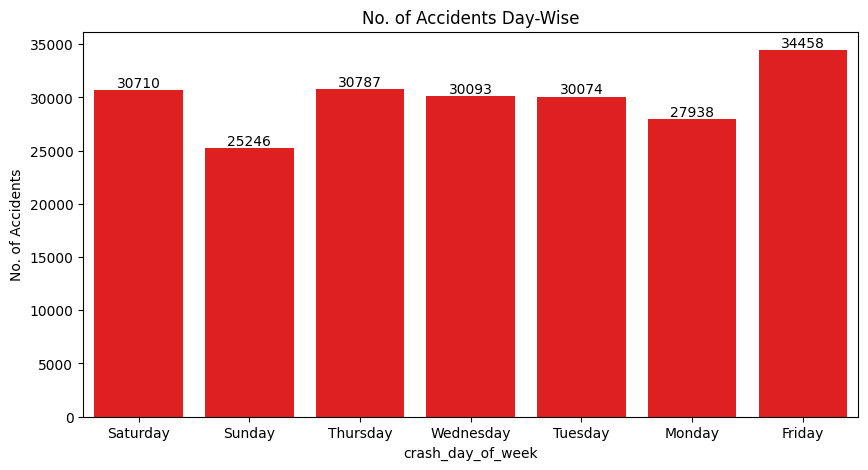

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['crash_day_of_week'],color='red')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("No. of Accidents Day-Wise")
plt.show()

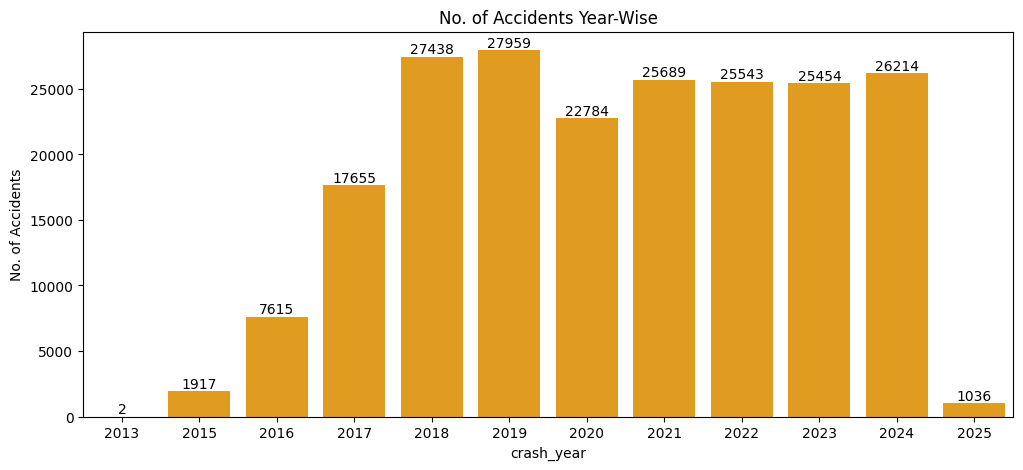

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['crash_year'],color='orange')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("No. of Accidents Year-Wise")
plt.show()

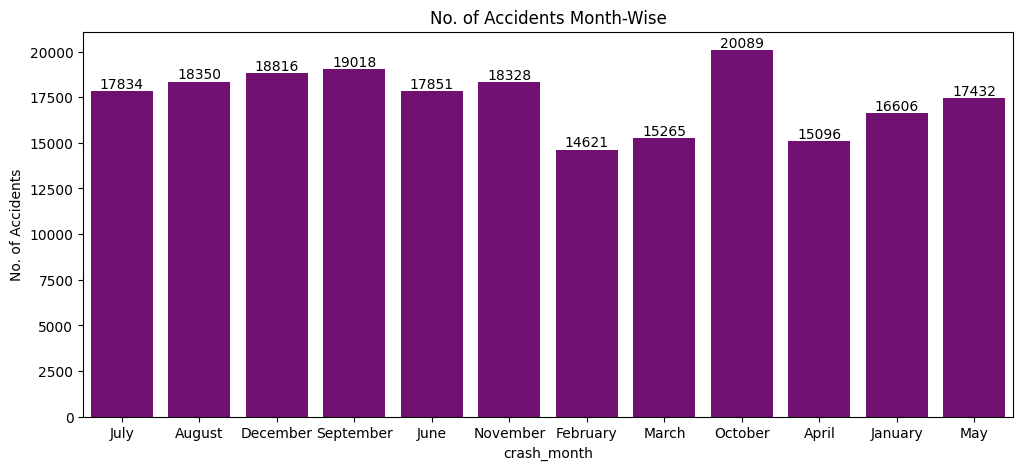

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['crash_month'],color='purple')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("No. of Accidents Month-Wise")
plt.show()

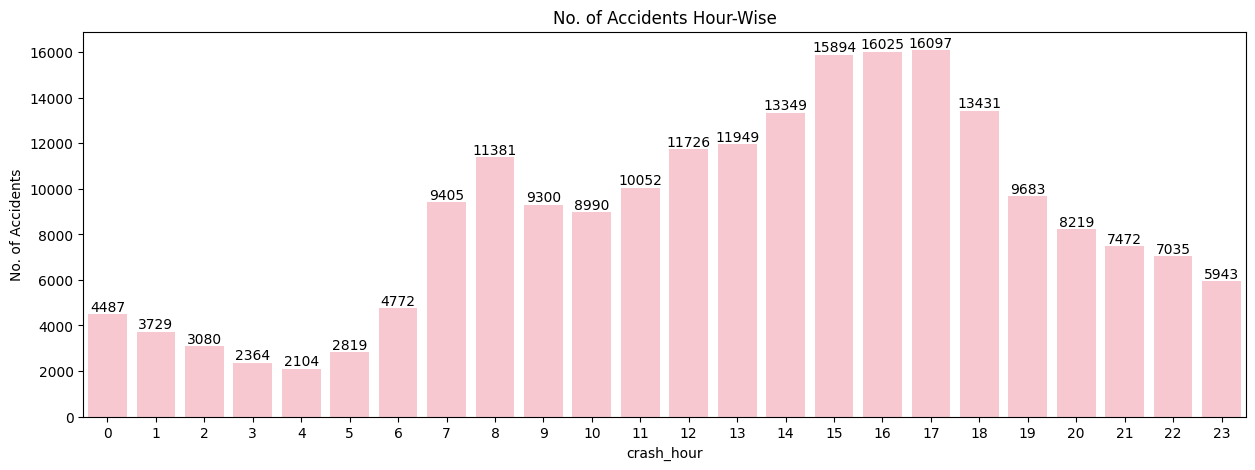

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['crash_hour'],color='pink')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("No. of Accidents Hour-Wise")
plt.show()

In [ ]:
df.sample(2)

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_min,crash_year
21868,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,...,0.0,0.0,0.0,0.0,2.0,12,Thursday,July,50,2018
58614,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,...,0.0,0.0,0.0,0.0,4.0,0,Sunday,May,23,2018


In [ ]:
#We are onlt taking top 6 trafficway type as per values counts to make our analysis easy
trafficway_type_top6 = df['trafficway_type'].value_counts().head(6).reset_index()
trafficway_type_top6

,trafficway_type,count
0,NOT DIVIDED,77753
1,FOUR WAY,49057
2,DIVIDED - W/MEDIAN (NOT RAISED),34221
3,ONE-WAY,12341
4,DIVIDED - W/MEDIAN BARRIER,10720
5,T-INTERSECTION,9233


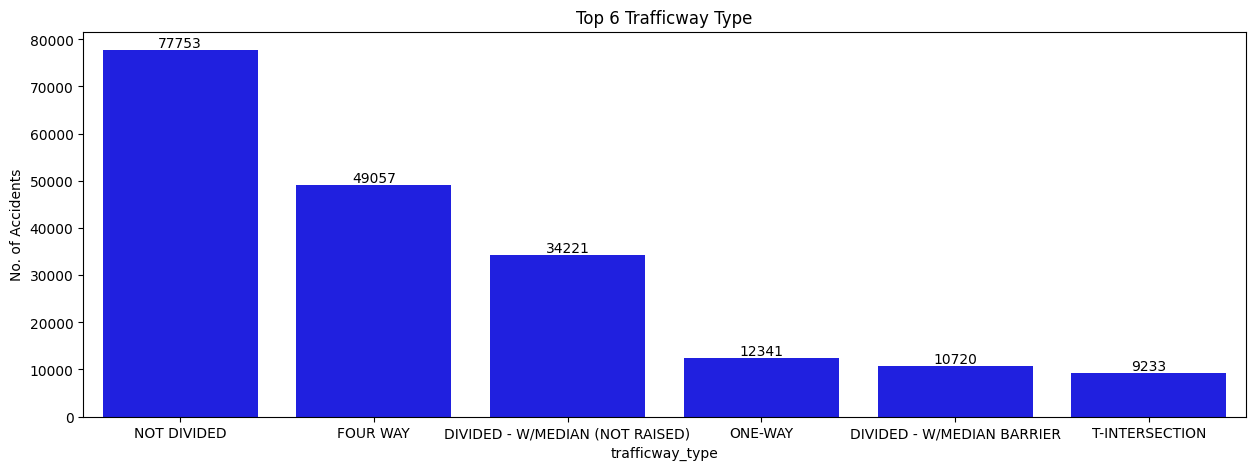

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=trafficway_type_top6['trafficway_type'],y=trafficway_type_top6['count'],color='blue')
#plt.xticks(rotation=45)

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("Top 6 Trafficway Type")
plt.show()

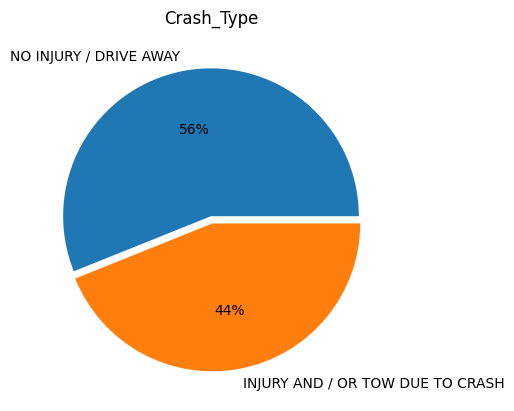

In [ ]:
data = df['crash_type'].value_counts().values
keys = df['crash_type'].value_counts().index
explode = [0, 0.05]
plt.title("Crash_Type")

plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [ ]:
#We are taking top 5 weather condtions based on counts to make our analysis easy
weather_condition_top5 = df[(df['weather_condition'] == 'CLEAR') | (df['weather_condition'] == 'RAIN') | (df['weather_condition'] == 'CLOUDY/OVERCAST') | (df['weather_condition'] == 'SNOW') | (df['weather_condition'] == 'FREEZING RAIN/DRIZZLE')]

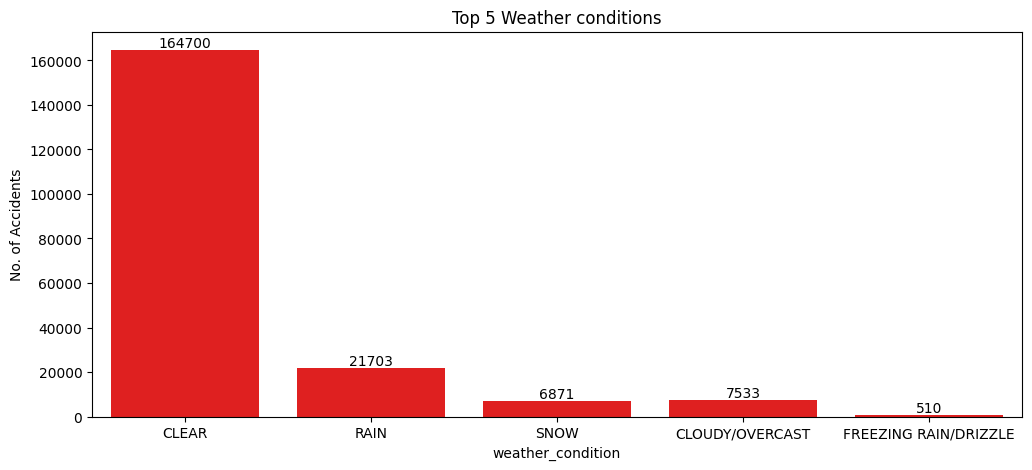

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=weather_condition_top5['weather_condition'],color='red')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("Top 5 Weather conditions")
plt.show()

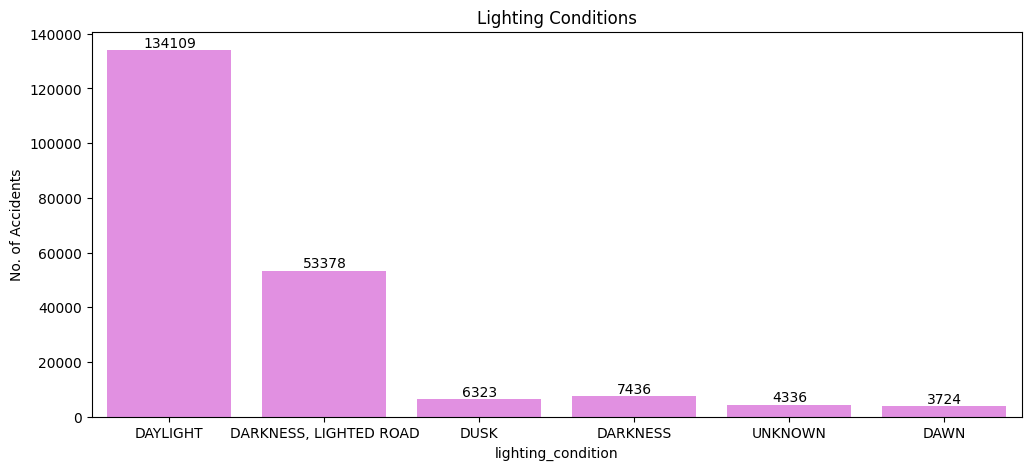

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['lighting_condition'],color='violet')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("Lighting Conditions")
plt.show()

In [ ]:
df.sample(5)

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_min,crash_year
197417,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,...,0.0,1.0,0.0,0.0,1.0,18,Wednesday,August,10,2024
119044,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,N,...,0.0,0.0,0.0,0.0,3.0,13,Tuesday,May,20,2019
163605,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,NO INJURY / DRIVE AWAY,N,...,0.0,0.0,0.0,0.0,2.0,20,Friday,February,45,2021
123529,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,...,0.0,0.0,0.0,0.0,2.0,7,Wednesday,December,50,2019
157235,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,...,0.0,0.0,1.0,0.0,1.0,6,Wednesday,December,10,2021


In [ ]:
pd.crosstab(weather_condition_top5['weather_condition'],df['lighting_condition'],normalize=True,margins=True)

lighting_condition,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,All
weather_condition,,,,,,,
CLEAR,0.026674,0.202914,0.013352,0.549174,0.023242,0.002757,0.818113
CLOUDY/OVERCAST,0.000452,0.004197,0.000859,0.030191,0.001460,0.000258,0.037419
FREEZING RAIN/DRIZZLE,0.000214,0.001048,0.000060,0.001088,0.000104,0.000020,0.002533
RAIN,0.006020,0.036986,0.002985,0.056617,0.004480,0.000715,0.107805
SNOW,0.001843,0.011887,0.000835,0.018141,0.001202,0.000224,0.034130
All,0.035203,0.257032,0.018091,0.655210,0.030489,0.003974,1.000000


In [ ]:
df['traffic_control_device'].value_counts().head(5)

,count
traffic_control_device,
TRAFFIC SIGNAL,123944
STOP SIGN/FLASHER,49139
NO CONTROLS,29508
UNKNOWN,4455
OTHER,670


**Insights:** From the above plots we can conclude that:

*   Number of accient occured on Friday is higher compared to other days and on Sunday least number of accients occured.
*   2018 and 2019 had maximun number of accidents. 2020 had slightly less number of accidents(lockdown Covid).
*   September, October, November and December found to have maximun number of crashes. (Festival session/ Winter season)
*   From 3 PM to 5 PM accidents counts are at peak. 11 PM to 6 AM least number of accidents(Night time less vechiles on road).
*   Non Divided trafficway found to be prime reason for most of the accidents. (Include speed limit or Divided roads).
*   56% of the accidents people had No injuries or they drove away and in 44% cases people had injuries or vechile was towed.
*   Weather had not much effect as majority of the accidents happended on Clear Weather conditions. Rain and snow weather conditions found to have some effect on accidents.
*   Majority of accidents happended at Daylight lightning conditions whereas Darkness could be also considered as a reason.

In [ ]:
df['crash_type'].value_counts()

,count
crash_type,
NO INJURY / DRIVE AWAY,117376
INJURY AND / OR TOW DUE TO CRASH,91930


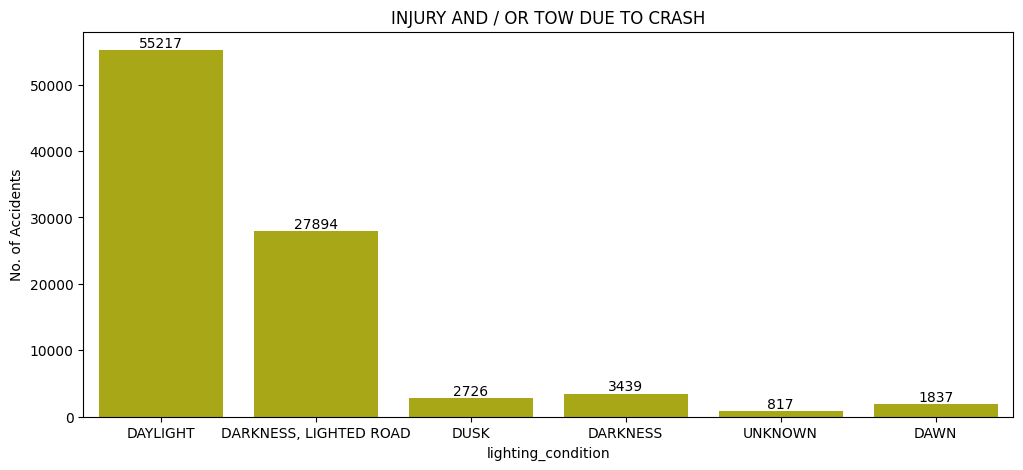

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df[df['crash_type'] == "INJURY AND / OR TOW DUE TO CRASH"]['lighting_condition'],color='y')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.title("INJURY AND / OR TOW DUE TO CRASH")
plt.show()


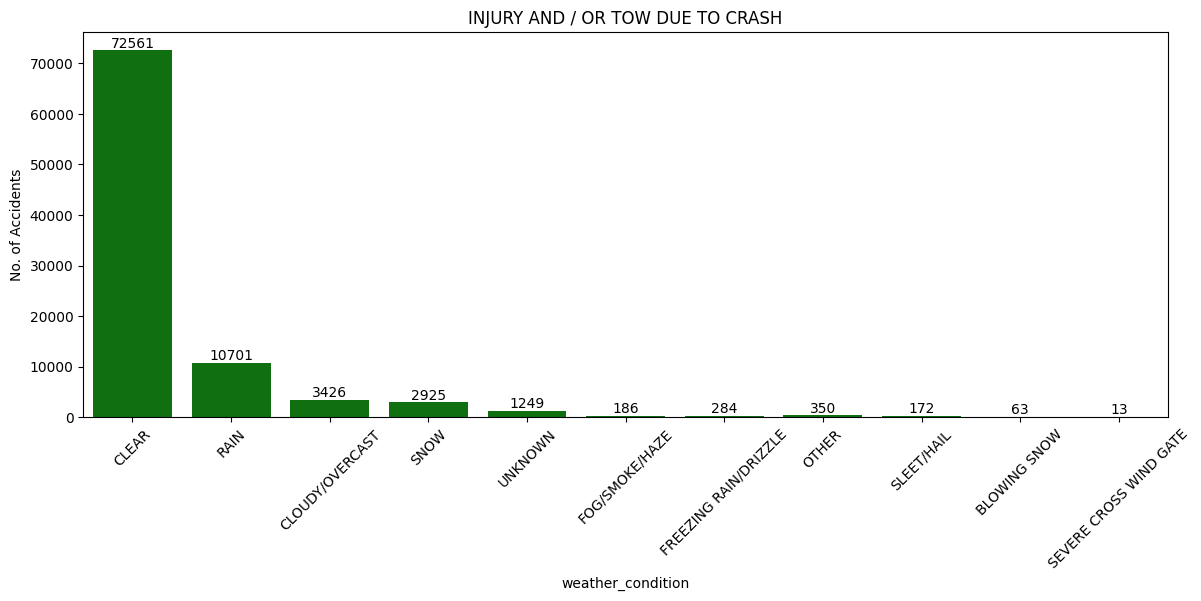

In [ ]:
plt.figure(figsize=(14,5))
ax = sns.countplot(x=df[df['crash_type'] == "INJURY AND / OR TOW DUE TO CRASH"]['weather_condition'],color='g')

for i in ax.containers:
  ax.bar_label(i,)

plt.ylabel("No. of Accidents")
plt.xticks(rotation=45)
plt.title("INJURY AND / OR TOW DUE TO CRASH")
plt.show()

In [ ]:
pd.crosstab(df['crash_type'],df['lighting_condition'],normalize=True,margins=True) #Checking the relationship between 'crash_type' and 'lighting_condtion'

lighting_condition,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,All
crash_type,,,,,,,
INJURY AND / OR TOW DUE TO CRASH,0.016430,0.133269,0.008777,0.263810,0.013024,0.003903,0.439213
NO INJURY / DRIVE AWAY,0.019096,0.121755,0.009016,0.376922,0.017185,0.016813,0.560787
All,0.035527,0.255024,0.017792,0.640732,0.030209,0.020716,1.000000


**Chi-square test to check if crash_type is dependent on the lighting_condition**

Chi-square test is a statistical hypothesis test used to analyze contingency tables and determine the relationship between two categorical variables, or to assess if observed frequencies differ significantly from expected frequencies.

Basically this test determines if two categorical variables are related or independent of each other.

Assumptions: The data must be categorical, observations must be independent, and the expected frequencies in each category should be at least 5 for valid results

Let us assume that:

Null Hypothesis(Ho) -> There is no relationship or association between the categorical variables

Alternate Hypothesis(Ha) -> There is relationship or association between the categorical variables

alpha = 0.05(95% confidence level)

In [ ]:
contingency_table = pd.crosstab(df['crash_type'],df['lighting_condition']) #Taking crosstab between lighting_condition and crash_type column to establish the connection
contingency_table

lighting_condition,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN
crash_type,,,,,,
INJURY AND / OR TOW DUE TO CRASH,3439,27894,1837,55217,2726,817
NO INJURY / DRIVE AWAY,3997,25484,1887,78892,3597,3519


In [ ]:
from scipy.stats import chi2_contingency #importing required library for chi-square test

chi2_contingency(contingency_table) #performing chi-square contingency test

Chi2ContingencyResult(statistic=np.float64(3086.6477557667913), pvalue=np.float64(0.0), dof=5, expected_freq=array([[ 3265.99084594, 23444.3328906 ,  1635.63070337, 58902.46992442,
         2777.14633121,  1904.42930446],
       [ 4170.00915406, 29933.6671094 ,  2088.36929663, 75206.53007558,
         3545.85366879,  2431.57069554]]))

From the above chi-square contigency test between two categorial column "crash_type" and "lighting_condition" we can see that p-value(0.0) < alpha(0.05). So we will reject our null hypothesis.

We can conclude that there is relationship or association between the two categorical variables "crash_type" and "lighting_condition".

**Final Insights:**

1. Accident Trends:

  * The highest number of accidents occur on Fridays, with the lowest on Sundays.
  * Accident counts peaked in 2018 and 2019, with a slight decrease in 2020.
  * September, October, November, and December have the most accidents, possibly due to festivals and winter weather.
  * Accidents are most frequent between 3 PM and 5 PM and least frequent between 11 PM and 6 AM.

2. Accident Factors:

  * Non-divided roadways are associated with the most accidents, highlighting a need for speed limits or road division.
  * In 56% of cases, there were no injuries or the drivers drove away, while 44% involved injuries or towing.
  * Most accidents occur in clear weather, but rain and snow also play a role.
  * Daylight is the most common lighting condition during accidents, but darkness is also a contributing factor.

3. Injury and Tow Accidents:

  * Accidents resulting in injuries or towing are more likely to happen in daylight.
  * These types of accidents occur most often in clear weather, followed by rain and snow.

**Final Business Insights:**

1. Traffic Management:

  * Focus on Fridays and peak hours (3 PM-5 PM) for traffic management.
  * Improve safety measures on non-divided roadways.
  * Implement strategies to reduce accidents during festival seasons and winter months.

2. Road Safety:

  * Raise awareness about the risks associated with driving in darkness and adverse weather conditions.
  * Promote safe driving practices during peak accident times.

3. Infrastructure Improvements:

  * Consider dividing non-divided roadways or implementing speed limits to reduce accidents.
  * Improve lighting and visibility on roads to enhance safety.

4. Emergency Response:

  * Allocate resources strategically based on accident trends and high-risk areas.
  * Ensure prompt emergency response during peak accident times.

These insights can be used by government agencies, transportation departments, and other stakeholders to develop strategies for improving road safety and reducing traffic accidents.